In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tsfeature as tsf
from sklearn.neighbors import NearestNeighbors

# Epsilon para RawBased

In [5]:
my_path = os.path.abspath('')
my_path = my_path.split('\\')
my_path_py = "\\".join(my_path[:-1])

dataset = pd.read_csv(my_path_py+'\\DatosRaw\\SerieTemporal_2015to2020.csv', sep=',')
dataset = dataset.fillna(0.00001)
dataset

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001
1,32.61220,65.22450,54.35370,65.22450,21.74150,10.87070,21.74150,10.87070,10.87070,10.87070,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001
2,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001
3,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001
4,0.00000,0.00000,0.00000,4.20468,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001
501,88.51120,70.80900,88.51120,35.40450,17.70220,17.70220,17.70220,17.70220,17.70220,17.70220,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001
502,56.01850,28.00920,28.00920,28.00920,14.00460,7.00231,7.00231,7.00231,14.00460,0.00000,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001
503,15.09210,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001


In [33]:
neighbors = NearestNeighbors(n_neighbors=4*2)
neighbors_fit = neighbors.fit(dataset)
distances, indices = neighbors_fit.kneighbors(dataset)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

217.49592809612238


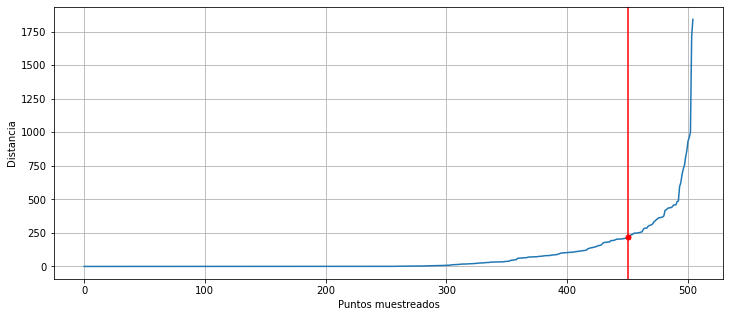

In [34]:
plt.figure(figsize=(12,5))
plt.ylabel('Distancia')
plt.xlabel('Puntos muestreados')
plt.plot(distances)
plt.grid(True)
plt.plot(450, np.interp(450, list(range(len(distances))), distances), marker='.', color='r', markersize=10)
plt.axvline(x=450, color='r')
plt.savefig(my_path_py + '/Pictures/EpsilonRawBased.png')
print(np.interp(450, list(range(len(distances))), distances))

# Epsilon para FeatureBased

In [20]:
dataset_FB = pd.read_csv(my_path_py+'\\2_FeatureBased\\18Features_Kats.csv', sep=',')
dataset_FB = dataset_FB.drop('Unnamed: 0', axis=1)
dataset_FB = dataset_FB.drop('Dep-Prov-Distrito', axis=1)
dataset_FB

,Mean,Var,aCF1,Trend,Linearity,Curvature,Season,Peak,Trough,Entropy,Lumpiness,Spikiness,Lshift,Vchange,Fspots,Cpoints,KlScore,ChangeIdx
0,1.224075e-01,2.367410e+00,1.000000e-11,0.217391,2.190154e-03,-9.800986e-01,0.350370,4.000000e+00,6.000000e+00,9.971295e-01,3.541005e+01,5.685961e-03,9.731400e-01,9.470015e+01,15,1.000000e+00,2.225272e+02,4.700000e+01
1,2.358745e+00,1.040623e+02,1.000000e-11,0.745504,1.242885e-01,-5.678866e+01,0.420031,3.000000e+00,1.000000e-11,8.062825e-01,3.217965e+04,1.444610e-01,3.804760e+00,1.683967e+03,31,4.000000e+00,7.014666e+02,2.200000e+01
2,1.000000e-11,4.411106e-52,1.000000e-11,0.000608,1.000000e-11,9.087678e-27,0.558212,1.000000e-11,6.000000e+00,9.078781e-32,1.000000e-11,1.321106e-108,1.000000e-11,1.000000e-11,15,1.000000e-11,1.000000e-11,1.000000e-11
3,1.000000e-11,2.114199e-52,1.000000e-11,0.194922,1.000000e-11,1.009742e-27,0.597398,1.000000e-11,6.000000e+00,2.926802e-31,1.513941e-108,3.036318e-108,1.000000e-11,1.000000e-11,10,1.000000e-11,1.000000e-11,1.000000e-11
4,1.586672e-02,6.646271e-02,1.000000e-11,0.367283,1.077138e-02,-3.980237e-01,0.686641,3.000000e+00,1.000000e-11,9.984567e-01,5.154063e-02,4.070703e-07,2.102340e-01,4.419833e+00,26,1.000000e+00,2.939822e+01,3.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,7.427270e-01,3.114674e+01,1.000000e-11,0.681199,2.019100e-02,-1.351215e+01,0.309022,3.000000e+00,6.000000e+00,8.402329e-01,7.434537e+03,5.943835e-02,3.163220e+00,1.087068e+03,26,1.000000e+00,7.042033e+02,5.200000e+01
501,4.133712e+00,3.440637e+02,1.000000e-11,0.790721,8.227208e-02,-8.253428e+01,0.276922,2.000000e+00,5.000000e+00,7.890024e-01,5.394571e+05,3.592915e+00,1.020930e+01,9.195445e+03,31,1.000000e+00,1.819396e+03,5.400000e+01
502,1.175859e+01,3.209811e+03,1.000000e-11,0.688150,4.658599e-02,-1.784233e+02,0.522322,1.000000e-11,5.000000e+00,8.643413e-01,4.020497e+07,9.283090e+02,3.186050e+01,8.363276e+04,21,3.000000e+00,4.652544e+03,4.200000e+01
503,4.745943e-02,7.140101e-01,1.000000e-11,0.497428,9.404389e-03,-1.873349e-01,0.669413,1.000000e-11,1.000000e+00,9.985749e-01,6.858627e+00,2.282726e-05,7.546050e-01,5.694287e+01,31,1.000000e-11,1.018731e-05,5.300000e+01


1128030.8477050285


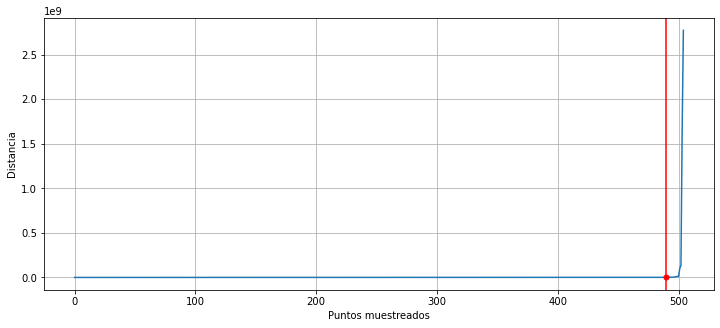

In [37]:
neighbors = NearestNeighbors(n_neighbors=36)
neighbors_fit = neighbors.fit(dataset_FB)
distances, indices = neighbors_fit.kneighbors(dataset_FB)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(12,5))
plt.ylabel('Distancia')
plt.xlabel('Puntos muestreados')
plt.plot(distances)
plt.grid(True)
plt.plot(490, np.interp(490, list(range(len(distances))), distances), marker='.', color='r', markersize=10)
plt.axvline(x=490, color='r')
plt.savefig(my_path_py + '/Pictures/EpsilonFeatureBased.png')
print(np.interp(490, list(range(len(distances))), distances))